In [10]:
from mistralai import Mistral
import os
from dotenv import load_dotenv
from pathlib import Path
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json
from mistralai.models import OCRResponse
import base64
from IPython.display import Markdown, display

load_dotenv()

True

{
    "pages": [
        {
            "index": 0,
            "markdown": "23:31-3\nThursday\n\nHouscay\n(41) How was socially and politically the landed\ncorrithology was dominant in Europe in spite\nof being numerically small?\n(42) Socially \\& politically, a landed aristocracy\nwas the dominant class on the continent.\n(3) The members and of this class were united by\na common way like that was decress Regional\ndivisions.\n(2) They owned estates in the countryside and also\ntown houses.\n(3) They abode French for purpose of diplomacy\nand in high society.\n(4) Their families were often connected by ties\nof marriage.\n\nByraibly explain it\non Europe.\n\nThe impact of inde\n(4) Endocrinologists\nfound and the\nclosed these over\nfrom the market.\n(5) Near decial growth\n\nPhotographers\n![img-0.jpeg](img-0.jpeg)",
            "images": [
                {
                    "id": "img-0.jpeg",
                    "top_left_x": 892,
                    "top_left_y": 1677,
       
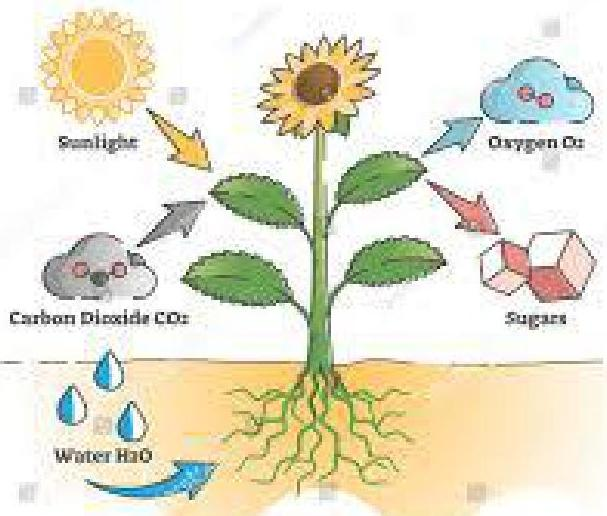

In [13]:
client = Mistral(api_key=os.getenv("MISTRAL_API_KEY"))
pdf_file = Path("sheet2.pdf")

uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)

signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

pdf_response = client.ocr.process(document=DocumentURLChunk(document_url=signed_url.url),
                                  model="mistral-ocr-latest",
                                  include_image_base64=True)

response_dict = json.loads(pdf_response.model_dump_json())
json_string = json.dumps(response_dict, indent=4)

print(json_string)

23:31-3
Thursday

Houscay
(41) How was socially and politically the landed
corrithology was dominant in Europe in spite
of being numerically small?
(42) Socially \& politically, a landed aristocracy
was the dominant class on the continent.
(3) The members and of this class were united by
a common way like that was decress Regional
divisions.
(2) They owned estates in the countryside and also
town houses.
(3) They abode French for purpose of diplomacy
and in high society.
(4) Their families were often connected by ties
of marriage.

Byraibly explain it
on Europe.

The impact of inde
(4) Endocrinologists
found and the
closed these over
from the market.
(5) Near decial growth

Photographers
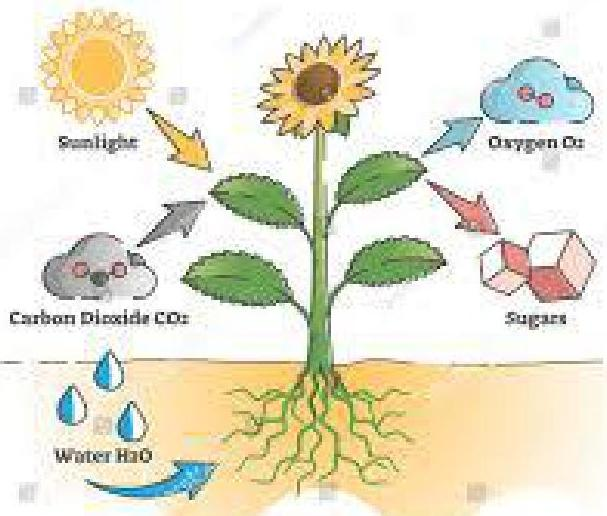

Employee orientation -
Employee orientation is a crucial onboarding process designed to integrate new nites into an organization
smoothly. It involves a structured introduction of
comis culture, policies, procedures and their specific roles and responsibilities. They also receive essential info about comp's history, mission, \& values, along with practical details like benefits,
compensation 2 workplace safety.
Meeting key team members, setting up necessary technology 2 touring the facilities.
Effective orientation posters a positive impression, aids in quicker adjustment 2 maker them comfortable.
Things that it includes in list form-

1) Welcome \& introduction.
2) comp's overview.
3) Policies \& procedures.
4) Employee handbook.
5) Tob- specific training.
6) Benefits \& compensation.
7) Tour of facilities.
8) It setup access.
9) Feedback \& follow up.

In [14]:
def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})")
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in pdf_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = img.image_base64
    markdowns.append(replace_images_in_markdown(page.markdown, image_data))

  return "\n\n".join(markdowns)

display(Markdown(get_combined_markdown(pdf_response)))

In [16]:
image_file = Path("sheet.png")
encoded = base64.b64encode(image_file.read_bytes()).decode()
base64_data_url = f"data:image/jpeg;base64,{encoded}"

image_response = client.ocr.process(document=ImageURLChunk(image_url=base64_data_url), model="mistral-ocr-latest")

response_dict = json.loads(image_response.model_dump_json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "pages": [
        {
            "index": 0,
            "markdown": "23/3/23\nPursuiting\n(11) How was socially and politically the landed\ncorrithology that dominant in Europe in spite\nof being numerically stand?\n(12) Socially \\& politically, a landed aristocracy\nand the dominant clast on the continent.\n(3) The members and of this clast were united by\na common way to the that said Sefress Regional\ndivisions.\n(2) They owned estates in the countryside and also\ndeath houses.\n(3) They spoke French from purpose of dida-\n(4) Their families were often connected by ties\nof marriage.\n(132) Socially explain the impact of individualization\non Europe.\nThe impact of individualization on Europe.\n(1) Individualization led to the growth of\ndownd and the and emergence of commercial\nclastes, those existence was based on production\nfrom the market.\n(2) New clast group came into being: a working",
            "images": [],
            "dimensions": {
                "dpi": 200,

In [17]:
image_ocr_markdown = image_response.pages[0].markdown

chat_response = client.chat.complete(
    model="pixtral-12b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                ImageURLChunk(image_url=base64_data_url),
                TextChunk(text=f"This is image's OCR in markdown:\n<BEGIN_IMAGE_OCR>\n{image_ocr_markdown}\n<END_IMAGE_OCR>.\nConvert this into a sensible structured json response. The output should be strictly be json with no extra commentary")
            ],
        },
    ],
    response_format =  {"type": "json_object"},
    temperature=0
)

response_dict = json.loads(chat_response.choices[0].message.content)
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "date": "23/3/23",
    "day": "Thursday",
    "assignment": {
        "question1": "How was socially and politically the landed aristocracy that dominated in Europe in spite of being numerically small?",
        "answer1": {
            "socially_and_politically": "A landed aristocracy was the dominant class on the continent.",
            "details": [
                "The members of this class were united by a common way of life that crossed regional divisions.",
                "They owned estates in the countryside and also town houses.",
                "They spoke French for purposes of diplomacy and in high society.",
                "Their families were often connected by ties of marriage."
            ]
        },
        "question2": "Briefly explain the impact of individualization on Europe.",
        "answer2": {
            "impact": "Individualization led to the growth of towns and the emergence of commercial classes, whose existence was based on production for the m

In [ ]:
from enum import Enum
from pathlib import Path
from pydantic import BaseModel
import base64
import pycountry

languages = {lang.alpha_2: lang.name for lang in pycountry.languages if hasattr(lang, 'alpha_2')}

class LanguageMeta(Enum.__class__):
    def __new__(metacls, cls, bases, classdict):
        for code, name in languages.items():
            classdict[name.upper().replace(' ', '_')] = name
        return super().__new__(metacls, cls, bases, classdict)

class Language(Enum, metaclass=LanguageMeta):
    pass

class StructuredOCR(BaseModel):
    file_name: str
    topics: list[str]
    languages: list[Language]
    ocr_contents: dict

print(StructuredOCR.schema_json())

def structured_ocr(image_path: str) -> StructuredOCR:
    image_file = Path(image_path)
    assert image_file.is_file(), "The provided image path does not exist."

    # Read and encode the image file
    encoded_image = base64.b64encode(image_file.read_bytes()).decode()
    base64_data_url = f"data:image/jpeg;base64,{encoded_image}"

    # Process the image using OCR
    image_response = client.ocr.process(document=ImageURLChunk(image_url=base64_data_url), model="mistral-ocr-latest")
    image_ocr_markdown = image_response.pages[0].markdown

    # Parse the OCR result into a structured JSON response
    chat_response = client.chat.parse(
        model="pixtral-12b-latest",
        messages=[
            {
                "role": "user",
                "content": [
                    ImageURLChunk(image_url=base64_data_url),
                    TextChunk(text=(
                        "This is the image's OCR in markdown:\n"
                        f"<BEGIN_IMAGE_OCR>\n{image_ocr_markdown}\n<END_IMAGE_OCR>.\n"
                        "Convert this into a structured JSON response with the OCR contents in a sensible dictionnary."
                    ))
                ],
            },
        ],
        response_format=StructuredOCR,
        temperature=0
    )

    return chat_response.choices[0].message.parsed

We can now extract structured output from any image parsed with our OCR model.

In [ ]:
from PIL import Image

image_path = "receipt.png"

image = Image.open(image_path)
image

In [ ]:
image_path = "receipt.png"
structured_response = structured_ocr(image_path)

response_dict = json.loads(structured_response.json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

In [ ]:
image_path = "/content/thai_learning.png"
image = Image.open(image_path)
image

In [ ]:
structured_response = structured_ocr(image_path)

response_dict = json.loads(structured_response.json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

In [ ]:
def format_thai_dictionary(thai_dict):
    """
    Format and display Thai characters correctly from the provided JSON dictionary.

    Args:
        thai_dict (dict): Dictionary containing Thai language data

    Returns:
        str: Formatted string with properly aligned Thai characters
    """
    output = []

    # Add title
    title = thai_dict.get("ocr_contents", {}).get("title", "")
    output.append(f"# {title}")
    output.append("")

    # Process sections
    for section in thai_dict.get("ocr_contents", {}).get("sections", []):
        section_title = section.get("title", "")
        output.append(f"## {section_title}")
        output.append("")

        # Create header based on section type
        if section_title == "Thai Consonants":
            output.append(f"{'Consonant':<15}{'Pronunciation':<20}{'Thai Character':<20}{'Meaning':<15}{'Translation':<15}")
            output.append("-" * 85)

            # Add consonant content
            for item in section.get("content", []):
                consonant = item.get("consonant", "")
                pronunciation = item.get("pronunciation", "")
                thai_character = item.get("thai_character", "")
                meaning = item.get("meaning", "")
                translation = item.get("translation", "")

                output.append(f"{consonant:<15}{pronunciation:<20}{thai_character:<20}{meaning:<15}{translation:<15}")

        elif section_title == "Vowels":
            output.append(f"{'Vowel':<15}{'Thai Character':<20}{'Meaning':<15}{'Translation':<15}")
            output.append("-" * 65)

            # Add vowel content
            for item in section.get("content", []):
                vowel = item.get("vowel", "")
                thai_character = item.get("thai_character", "")
                meaning = item.get("meaning", "")
                translation = item.get("translation", "")

                output.append(f"{vowel:<15}{thai_character:<20}{meaning:<15}{translation:<15}")

        output.append("")  # Add empty line after each section

    return "\n".join(output)

# Example usage

#
formatted_output = format_thai_dictionary(response_dict)
print(formatted_output)